In [1]:
import numpy as np
import pandas as pd
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [2]:
sz=320
bs = 32
path='data/hackerearth-myntra'
arch=dn121

In [3]:
aug_tfms=[RandomFlip(),RandomRotate(20)]

In [4]:
tfms = tfms_from_model(arch,sz,crop_type=CropType.RANDOM,aug_tfms=aug_tfms)

In [5]:
def get_augs():
    data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=tfms,bs=bs)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[4]

In [6]:
ims = np.stack([get_augs() for i in range(4)])

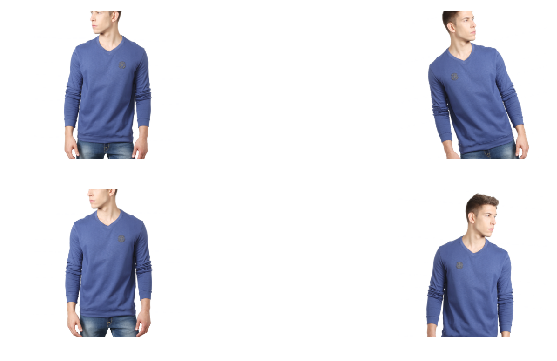

In [7]:
plots(ims, rows=2)

In [8]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=tfms,bs=bs)

In [9]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2,continuos=False)

In [10]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 81%|████████  | 1379/1709 [00:15<00:03, 90.11it/s, loss=5.59]

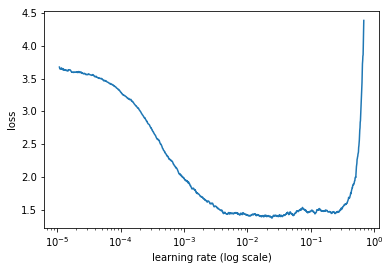

In [11]:
learn.sched.plot()

In [12]:
lr = 2e-3

In [13]:
learn.fit(lr,3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

 23%|██▎       | 401/1709 [00:04<00:13, 98.34it/s, loss=1.32] 

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                     
    0      1.17461    1.052871   0.693633  
    1      1.040105   0.995334   0.707287                      
    2      0.990726   0.965595   0.717509                       



[0.96559465, 0.71750876168224298]

In [14]:
learn.precompute=False

In [15]:
learn.fit(0.002,3,cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      1.020431   0.947709   0.718093  
    1      1.053061   0.93806    0.718531                      
    2      1.018888   0.928479   0.722985                      



[0.92847884, 0.72298481308411211]

In [16]:
learn.unfreeze()

In [17]:
lr=np.array([1e-5,1e-4,1e-3])

In [18]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  0%|          | 0/1709 [00:00<?, ?it/s]


RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1512387374934/work/torch/lib/THC/generic/THCStorage.cu:58

In [ ]:
learn.sched.plot()

In [ ]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.fit(0.005,2)

In [ ]:
learn.fit(0.005,2)

In [ ]:
learn.fit(0.005,4)

In [ ]:
learn.fit(0.001,5)

In [ ]:
learn.fit(0.0005,4)

In [ ]:
learn.fit(0.0001,4)

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit(0.0005,2)

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix_mine(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(12,12))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)
y[10]=9
predictions = np.argmax(probs,axis=1)
cm = confusion_matrix(y, predictions)
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

In [ ]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)